In [4]:
import pandas as pd
import numpy as np

filename = 'emmissions_data.csv'
emmissions_df = pd.read_csv(filename)

In [5]:
emmissions_df.head()

,file,year,manufacturer,model,description,euro_standard,transmission,transmission_type,engine_capacity,fuel_type,...,urban_imperial,extra_urban_imperial,combined_imperial,noise_level,co2,thc_emissions,co_emissions,nox_emissions,thc_nox_emissions,particulates_emissions
0,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,2,M5,Manual,1598.0,Petrol,...,25.4,43.5,34.4,74.0,195,NaN,980.0,NaN,NaN,NaN
1,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,2,M5,Manual,1747.0,Petrol,...,24.6,42.8,33.6,74.0,200,NaN,1105.0,NaN,NaN,NaN
2,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,Cloverleaf,2,M5,Manual,1970.0,Petrol,...,22.8,42.8,32.1,74.0,210,NaN,1103.0,NaN,NaN,NaN
3,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,2,M5,Manual,1598.0,Petrol,...,25.0,42.8,34.0,73.0,195,NaN,980.0,NaN,NaN,NaN
4,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,2,M5,Manual,1747.0,Petrol,...,24.6,42.8,33.6,74.0,200,NaN,1105.0,NaN,NaN,NaN


Q1) How many rows and columns are there in the data set? (Answer: 45511 rows and 23 columns.) 


Q2)How many rows of the data set feature cars manufactured by Lamborghini? 

In [6]:
manufacts = emmissions_df['manufacturer']

print 'Answer:', sum(manufacts == 'Lamborghini')

Answer: 103


Q3) Which name appears most often in the manufacturer column of the data? 

In [7]:
manufacts.describe()

count             45511
unique               62
top       Mercedes-Benz
freq               5836
Name: manufacturer, dtype: object

Q4) Which manufacturer's name appears in the data with two different spellings (differing only by case)? Explain how you might fix this problem, giving a suitable command. Answer = 'MG Motors UK'/'MG Motors Uk'

In [8]:
#print a list of unique manufacturers in order to check for duplicates ('MG Motors UK'/'MG Motors Uk')

unique_manufacts = set()
for item in manufacts:
    unique_manufacts.add(item)

print sorted(unique_manufacts)

#Replace 'MG Motors Uk' occurences with 'MG Motors UK'

manufacts.replace(to_replace='MG Motors Uk', value='MG Motors UK', inplace=True)

#Confirm that alteration has occured in original data series

sum(emmissions_df['manufacturer'] == 'MG Motors Uk')

['Abarth', 'Alfa Romeo', 'Aston Martin Lagonda', 'Audi', 'BMW', 'Bentley Motors', 'Cadillac', 'Chevrolet', 'Chrysler Jeep', 'Citroen', 'Corvette', 'Dacia', 'Daewoo Cars', 'Daihatsu', 'Dodge', 'Ferrari', 'Fiat', 'Ford', 'Honda', 'Hummer', 'Hyundai', 'Infiniti', 'Isuzu', 'Jaguar Cars', 'Kia', 'LTI', 'Lamborghini', 'Land Rover', 'Lexus', 'Lotus', 'MG Motors UK', 'MG Motors Uk', 'MG Rover Group', 'Maserati', 'Mazda', 'McLaren', 'Mercedes-Benz', 'Metrocab', 'Micro Compact Car', 'Mini', 'Mitsubishi', 'Morgan Motor Company', 'Nissan', 'Perodua', 'Peugeot', 'Porsche', 'Proton', 'Renault', 'Rolls-Royce', 'Rover Group Limited', 'Saab', 'Seat', 'Skoda', 'Smart', 'SsangYong', 'Subaru', 'Suzuki', 'Tata', 'Toyota', 'Vauxhall', 'Volkswagen', 'Volvo']


0

Q5) Four values in the noise_level column are clearly erroneous. What row numbers do these errors occur on? 

In [9]:
#Setting an upper and lower limit by number of standard deviations from the mean

noise = emmissions_df['noise_level']
n_mean = noise.mean()
n_stdev = noise.std()
six_stdev_upper = n_mean + (n_stdev*6)
six_stdev_lower = n_mean - (n_stdev*6)

#Prints number of values that are a long way from the mean. Started at 2 stdevs and increased until only 4 values returned.

print sum((noise > six_stdev_upper) == True)
print sum((noise < six_stdev_lower) == True)

#Assigning a total to -1 allows row numbers of suspicious values to be seen later
total = -1
drop_list = []

for item in noise:
    total = total + 1
    if item < six_stdev_lower or item > six_stdev_upper:
        print 'Value: ', item, '|', 'Row number: ', total
        drop_list.append(total)

0
4
Value:  0.2 | Row number:  19609
Value:  0.7 | Row number:  21500
Value:  0.2 | Row number:  21515
Value:  0.3 | Row number:  22122


In [10]:
#removing these rows from the data frame (DO NOT RUN MORE THAN ONCE. IF YOU DO RERUN ALL CODE FROM START)

noise.drop(noise.index[[drop_list]], inplace=True)

Q6) Generate a histogram showing the data in the noise_level column, excluding the outliers you identified above, and output this histogram as a pdf file

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


plot1 = noise.hist()
plt.savefig('plot1.png')


Q7) The extra_urban_metric column also contains two highly anomalous values. What is the model of car associated with these outliers? 

In [12]:
extra_urban = emmissions_df['extra_urban_metric']

#Setting an upper and lower limit by number of standard deviations from the mean

extra_urban_mean = extra_urban.mean()
print 'mean: ', extra_urban_mean
extra_urban_stdev = extra_urban.std()
twelve_stdev_upper = extra_urban_mean + (extra_urban_stdev*12)
twelve_stdev_lower = extra_urban_mean - (extra_urban_stdev*12)

#Prints number of values that are a long way from the mean. Started at 2 stdevs and increased until only 2 values returned.

print sum((extra_urban > twelve_stdev_upper) == True)
print sum((extra_urban < twelve_stdev_lower) == True)

#Assigning a total to -1 allows row numbers of suspicious values to be seen later


total = -1
#drop_list = []

for item in extra_urban:
    total = total + 1
    if item < twelve_stdev_lower or item > twelve_stdev_upper:
        print 'Value: ', item, '|', 'Row number: ', total
        #drop_list.append(total)



model = emmissions_df['model']
print"___________________________"
print "'Problem models': "
print"___________________________"
print model[8557]
print model[11639]

mean:  6.13960174074
2
0
Value:  97.9 | Row number:  8557
Value:  97.9 | Row number:  11639
___________________________
'Problem models': 
___________________________
Omega - Model Year 2003
Omega - Model Year 2003


Q8) Estimate (roughly) a more reasonable value of extra_urban_metric for the anomalous data points in question 7, by examining the readings for other cars of the same model. 
 

In [36]:

model = emmissions_df['model']
print model[8544:8558]
print extra_urban[8544:8558]
est_extra_urban = (extra_urban[8544:8557]).mean()
print '____________________________________________________'
print "Estimated 'Extra Urban' value for anomolous values in Question 7: ", est_extra_urban

8544    Omega - Model Year 2003
8545    Omega - Model Year 2003
8546    Omega - Model Year 2003
8547    Omega - Model Year 2003
8548    Omega - Model Year 2003
8549    Omega - Model Year 2003
8550    Omega - Model Year 2003
8551    Omega - Model Year 2003
8552    Omega - Model Year 2003
8553    Omega - Model Year 2003
8554    Omega - Model Year 2003
8555    Omega - Model Year 2003
8556    Omega - Model Year 2003
8557    Omega - Model Year 2003
Name: model, dtype: object
8544     7.7
8545     7.1
8546     7.9
8547     7.3
8548     5.6
8549     5.7
8550     8.6
8551     8.3
8552     8.7
8553     8.5
8554     8.9
8555     7.8
8556     9.0
8557    97.9
Name: extra_urban_metric, dtype: float64
____________________________________________________
Estimated 'Extra Urban' value for anomolous values in Question 7:  7.77692307692


Question 9) Based on the data, what is the relationship between the columns urban_metric, extra_urban_metric and combined_metric? Using this relationship, can you improve upon your answer to question 8? 

In [122]:
#Remove NaNs

metric_df = emmissions_df.loc[:, ['urban_metric','extra_urban_metric', 'combined_metric']]
metric_df = metric_df.dropna()
print metric_df

urban_metric = metric_df['urban_metric']
extra_urban_metric = metric_df['extra_urban_metric']
combined_metric = metric_df['combined_metric']



       urban_metric  extra_urban_metric  combined_metric
0              11.1                 6.5              8.2
1              11.5                 6.6              8.4
2              12.4                 6.6              8.8
3              11.3                 6.6              8.3
4              11.5                 6.6              8.4
5              12.4                 6.6              8.8
6              11.4                 6.4              8.2
7              11.4                 6.4              8.2
8              11.7                 6.6              8.5
9              11.7                 6.6              8.5
10              8.9                 5.4              6.7
11             16.5                 8.4             11.4
12             17.5                 8.6             11.9
13             11.5                 6.5              8.3
14             11.7                 6.4              8.4
15             12.2                 6.8              8.8
16             12.2            

Populating the interactive namespace from numpy and matplotlib


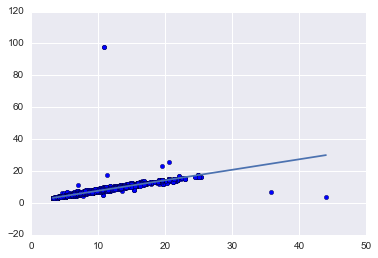

In [171]:
#Simplest way to plot linear regression with line of best fit, but no equation for the line


import numpy as np
import matplotlib.pyplot as plt

x = combined_metric
y = extra_urban_metric
%pylab inline
plt.scatter(x,y)

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

b =  1.06235387061
m =  0.657436996441


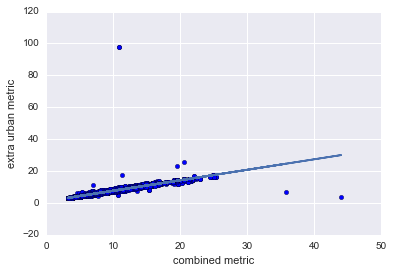

In [167]:
#An alternative method that give values for b(intercept) and m(slope) of the line, allowing y to be estimated from x.

from pylab import *
x = combined_metric
y = extra_urban_metric
(m,b)= polyfit(x,y,1)
print 'b = ', b
print 'm = ', m
yp=polyval([m,b],x)

plot (x,yp)
scatter(x, y)
grid=True
xlabel('combined metric')
ylabel('extra urban metric')
show()

                            OLS Regression Results                            
Dep. Variable:     extra_urban_metric   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                 2.607e+05
Date:                Thu, 24 Nov 2016   Prob (F-statistic):               0.00
Time:                        15:19:50   Log-Likelihood:                -47506.
No. Observations:               45498   AIC:                         9.502e+04
Df Residuals:                   45496   BIC:                         9.503e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const               1.0624      0.010    1

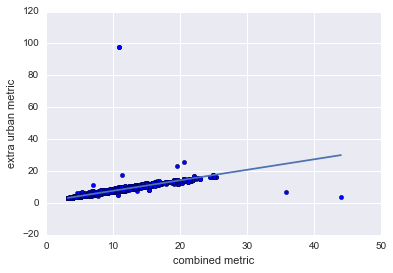

In [172]:
# A more comprhensive method that also provides statistical info. Coefficients provide values for b(intercept) and m: 
# below b is '0.6574' and m is '1.0624'

import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

x = combined_metric
y = extra_urban_metric

results = sm.OLS(y,sm.add_constant(x)).fit()

print results.summary()

plt.scatter(x,y)
xlabel('combined metric')
ylabel('extra urban metric')
line = plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))


line

In [138]:
#Working out the value to plug in for x in order to get missing y value

cm = emmissions_df['combined_metric']
print cm[8557]
print cm[11639]

10.9
10.9


In [173]:
#function takes an x value and returns an estimate for y... just input values for x, m and b

def get_y_from_x(x,m,b):
    y = (m*x)+b
    return y

print 'Estimated value for extra urban metric: ', get_y_from_x(10.9,0.66,1.0623)

Estimated value for extra urban metric:  8.2563


Question 10) Describe the relationship between urban_metric and urban_imperial. Can you explain this relationship? 

In [180]:
urban_metric_imperial = emmissions_df.loc[:,['urban_metric','urban_imperial']]
urban_metric_imperial = urban_metric_imperial.dropna()
urban_metric = urban_metric_imperial['urban_metric']
urban_imperial = urban_metric_imperial['urban_imperial']

Populating the interactive namespace from numpy and matplotlib


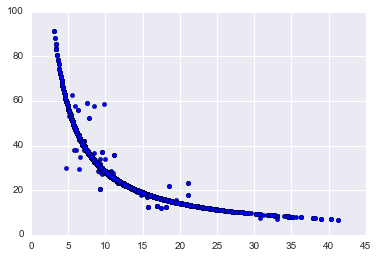

In [182]:
import numpy as np
import matplotlib.pyplot as plt

x = urban_metric
y = urban_imperial
%pylab inline
plt.scatter(x,y)


Question 11 How many entries in the description column contain the text "sunroof"? (Hint: The answer is a number between 30 and 40.) 


In [188]:
description = emmissions_df['description']

total = 0
for item in description:
    if 'sunroof' in item:
        print item
        total = total+1
print '_________________________________________________'
print "Number of entries containing the text 'sunroof':", total

1.9 dCi (JK0GB6)(w/sunroof)
2.0 16V 140 (JK0KB6)(w/sunroof)
2.0T 16V 165 (JK0BB6)(w/sunroof)
2.0T 16V 165 Auto (JK0BB6)(w/sunroof)
2.2 dCi (JK0HB6)(w/sunroof)
2.2 dCi Auto From VIN JK0HBB(w/sunroof)
3.0 dCi Auto (JK0JA/BB)(w/w.o sunroof)
3.5 V6 24V Auto (JK0FBB)(w/sunroof)
2.0T 16V 165 (JK0BD6)(w/sunroof)
2.0T 16V Auto (JK0BDB)(w/sunroof)
2.2 dCi (JK0HC/D6)(w/w.o sunroof)
2.2 dCi Auto (JK0HC/DB)(w/w.o sunroof)
3.0 dCi Auto (JK0JDB)(w/sunroof)
3.5 V6 24V Auto (JK0FDB)(w/sunroof)
1.9 dCi (JK0GB6) (w/sunroof)
2.0T 16V 165 (JK0BB6) (w/sunroof)
2.0T 16V 165 Auto (JK0BB6) (w/sunroof)
2.2 dCi (JK0HB6) (w/sunroof)
2.2 dCi Auto (JK0HBB) (w/sunroof)
3.0 dCi Auto (JK0JA/BB) (w/w.o.sunroof)
3.5 V6 24V Auto (JK0FBB) (w/sunroof)
2.0T 16V 165 (JK0BD6) (w/sunroof)
2.0T 16V Auto (JKOBDB) (w/sunroof)
2.2 dCi (JK0HC/D6) (w/w.o.sunroof)
2.2 dCi Auto (JK0HC/DB) (w/w.o.sunroof)
3.0 dCi Auto (JK0JDB) (w/sunroof)
3.5 V6 24V Auto (JK0FDB) (w/sunroof)
1.5 dCi 106 (w/sunroof)
1.5 dCi 106 (w/sunroof)
2.0 AWD Outb

Which manufacturer's cars have the highest average noise level, looking across the whole data set? 

In [246]:
manuf = emmissions_df.groupby(['manufacturer'],as_index=False).mean()
man_noise = manuf.sort_values(by=['noise_level'], ascending =False) 
print 'Lamborghini'
man_noise.head()


Lamborghini


,manufacturer,year,euro_standard,engine_capacity,urban_metric,extra_urban_metric,combined_metric,urban_imperial,extra_urban_imperial,combined_imperial,noise_level,co2,thc_emissions,co_emissions,nox_emissions,thc_nox_emissions,particulates_emissions
26,Lamborghini,2005.786408,3.495146,5735.378641,31.000000,13.996117,20.250485,9.426214,20.687379,14.355340,74.518447,476.213592,65.305085,680.597561,50.147541,NaN,NaN
10,Corvette,2009.442308,4.307692,6223.788462,20.280769,9.346154,13.378846,13.994231,30.346154,21.190385,74.365385,316.096154,59.038462,799.519231,19.884615,NaN,NaN
22,Isuzu,2003.307692,2.769231,3246.500000,16.773077,9.828846,12.400000,17.517308,29.125000,23.357692,74.301923,308.423077,71.666667,540.961538,388.888889,NaN,12.004038
44,Porsche,2008.511551,4.333333,3646.169967,16.108746,8.082838,11.019307,18.166502,35.632673,26.274092,74.165017,262.615512,55.460179,344.866502,30.022323,166.909091,0.623385
15,Ferrari,2007.283951,3.888889,5021.740741,27.996296,12.486420,18.134568,10.709877,23.328395,16.285185,74.133333,417.456790,55.542857,441.419753,48.293333,NaN,NaN


Question 13) Analyse the relationship between engine capacity and CO2 emissions. Generate two or more plots to illustrate this relationship, and store them within a single pdf file. How much CO2 would you expect to be emitted by a car with an engine capacity of 7500? How confident are you in this estimate? 

In [240]:
engine_capacity_co2 = emmissions_df.loc[:,['engine_capacity', 'co2']]
engine_capacity_co2 = engine_capacity_co2.dropna()

engine_capacity = engine_capacity_co2['engine_capacity']
co2 = engine_capacity_co2['co2']



                            OLS Regression Results                            
Dep. Variable:                    co2   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                 7.979e+04
Date:                Thu, 24 Nov 2016   Prob (F-statistic):               0.00
Time:                        16:38:27   Log-Likelihood:            -2.2546e+05
No. Observations:               45504   AIC:                         4.509e+05
Df Residuals:                   45502   BIC:                         4.509e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const              79.2918      0.422    1

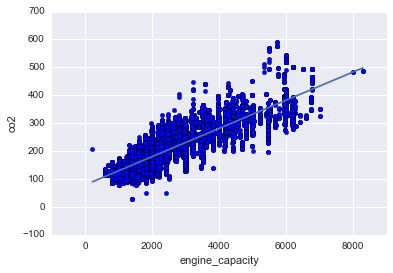

In [244]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

x = engine_capacity
y = co2

results = sm.OLS(y,sm.add_constant(x)).fit()

print results.summary()

plt.scatter(x,y)
xlabel('engine_capacity')
ylabel('co2')
plot2 = plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.savefig('plot2.png')

In [243]:
print 'Estimated value for co2 emmissions: ', get_y_from_x(7500,0.0505,79.2918)

Estimated value for co2 emmissions:  458.0418


Populating the interactive namespace from numpy and matplotlib


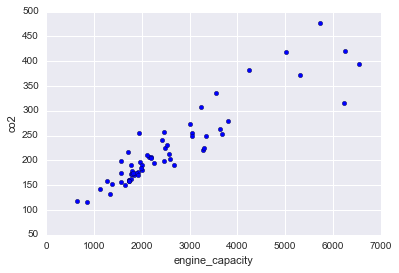

In [250]:
#Avergaing engine capacity and co2 emmissions by manufacturer

ec = manuf['engine_capacity']
carb = manuf['co2']

import numpy as np
import matplotlib.pyplot as plt

x = ec
y = carb
%pylab inline
plt.scatter(x,y)
xlabel('engine_capacity')
ylabel('co2')

Question 14) What problem do you notice in the final column of the data (labelled particulates_emissions), and how would you go about fixing it? 